In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib qt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# --- Core packages
import mne
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# --- Complementary packages
import os
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA

# --- Local modules


In [ ]:
# --- Data Files Directories
sub="02
#all_sub=[f"0{i}" for i in range(1,10)]+[f"{i}" for i in range(10,16)]
run="01"
all_run=[f"0{i}" for i in range(1,10)]+[f"{i}" for i in range(10,15)]
base_path="/Volumes/DATA_MEG"
data_path=base_path+"/mne-bids-pipeline"
bids_path=base_path+"/BIDS"
sub_data_path=data_path+"/sub-"+sub
sub_bids_path=bids_path+"/sub-"+sub+"/meg/"
epoch_data_path=sub_data_path+"/meg"+f"/sub-{sub}_task-abseq_split-01_epo.fif"
#epoch_data_path=sub_data_path+"/meg"+f"/sub-{sub}_task-abseq_epo.fif"
#/Volumes/T5_EVO/REPLAYSEQ/ICM/Data_ICM/BIDS/sub-01/meg/sub-01_task-reproduction_run-01_meg.fif

# --- Parameters files
cross_talk_file=data_path+"calibration_files/ct_sparse_nspn.fif"
fine_cal_file=data_path+"calibration_files/sss_cal_nspn.dat"

In [18]:
data_path='/Volumes/T5_EVO/REPLAYSEQ/ICM/Data_ICM/BIDS'
raw_path=data_path+"/sub-01/meg/sub-01_task-reproduction_run-01_meg.fif"

cross_talk_file=data_path+"/ct_sparse.fif"
fine_cal_file=data_path+"/sss_cal_3101_160108.dat"

In [20]:
raw=mne.io.read_raw_fif(raw_path,allow_maxshield=True)

Opening raw data file /Volumes/T5_EVO/REPLAYSEQ/ICM/Data_ICM/BIDS/sub-01/meg/sub-01_task-reproduction_run-01_meg.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
    Range : 51000 ... 532999 =     51.000 ...   532.999 secs
Ready.


/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_44537/1570017681.py:1: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw=mne.io.read_raw_fif(raw_path,allow_maxshield=True)


In [23]:
raw.info['dig']

[<DigPoint |        LPA : (-67.8, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 108.5, 0.0) mm      : head frame>,
 <DigPoint |        RPA : (69.5, -0.0, -0.0) mm     : head frame>,
 <DigPoint |     HPI #1 : (71.0, -16.5, 20.4) mm    : head frame>,
 <DigPoint |     HPI #2 : (37.6, 93.3, 76.8) mm     : head frame>,
 <DigPoint |     HPI #3 : (-69.4, -26.0, 5.2) mm    : head frame>,
 <DigPoint |     HPI #4 : (-49.2, 83.3, 71.7) mm    : head frame>,
 <DigPoint |   Extra #1 : (0.6, 109.0, 71.1) mm     : head frame>,
 <DigPoint |   Extra #2 : (3.6, 107.0, 74.6) mm     : head frame>,
 <DigPoint |   Extra #3 : (2.6, 105.8, 78.3) mm     : head frame>,
 <DigPoint |   Extra #4 : (1.0, 101.5, 84.2) mm     : head frame>,
 <DigPoint |   Extra #5 : (-0.3, 97.8, 89.4) mm     : head frame>,
 <DigPoint |   Extra #6 : (1.3, 88.8, 98.8) mm      : head frame>,
 <DigPoint |   Extra #7 : (1.8, 80.7, 105.0) mm     : head frame>,
 <DigPoint |   Extra #8 : (1.4, 72.2, 109.9) mm     : head fra

In [25]:
eeg_channels = [ch for ch in raw.info['chs'] if ch['kind'] == mne.io.constants.FIFF.FIFFV_EEG_CH]

# Print information about EEG channels
for ch in eeg_channels:
    print("Channel Name:", ch['ch_name'])
    print("Channel Position:", ch['loc'])
    print()  # Add a blank line for readability

Channel Name: EEG001
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG002
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG003
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG004
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG005
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG006
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG007
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG008
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG009
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG010
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG011
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG012
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]

Channel Name: EEG013
Channel Position: [0. 0. 0. 1. 0. 0. 0. 1. 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


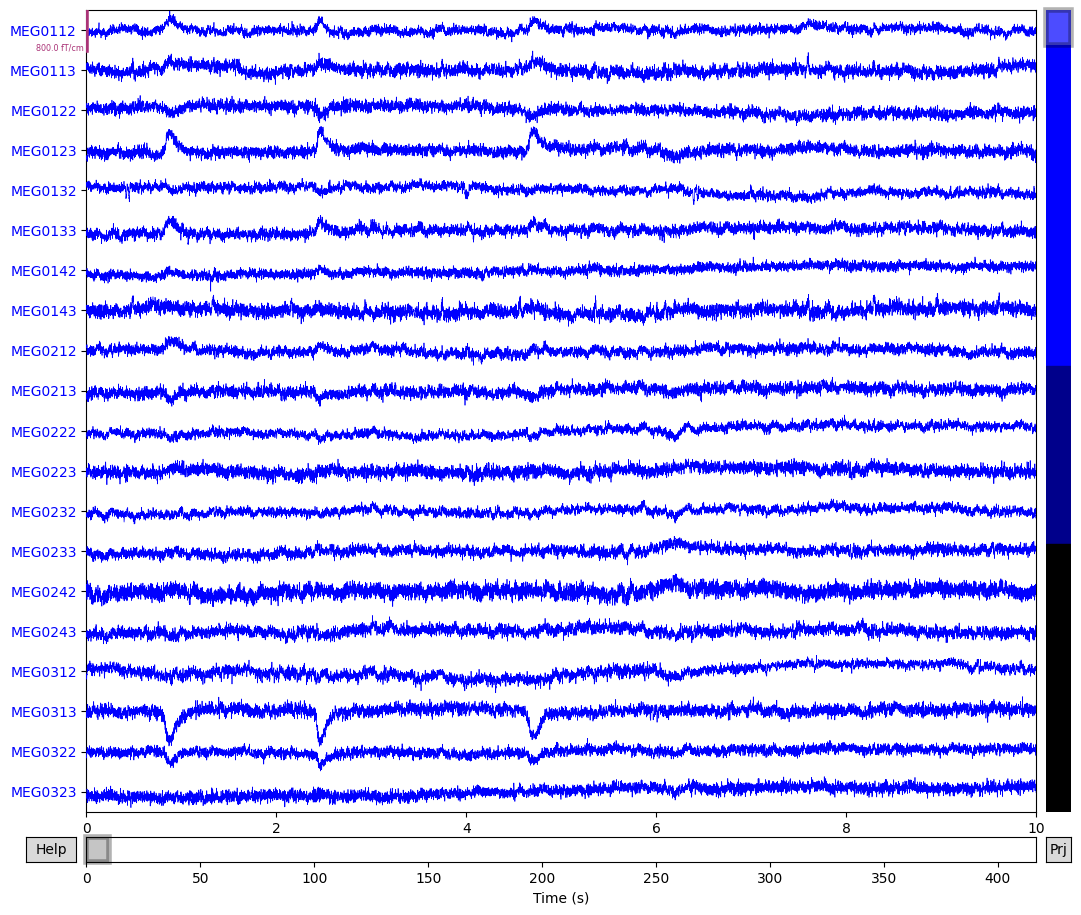

Channels marked as bad:
none


In [45]:
raw.plot()

In [46]:
channel_names=raw.ch_names

In [47]:
channel_names

['BIO001',
 'BIO002',
 'BIO003',
 'BIO004',
 'BIO005',
 'BIO006',
 'EEG001',
 'EEG002',
 'EEG003',
 'EEG004',
 'EEG005',
 'EEG006',
 'EEG007',
 'EEG008',
 'EEG009',
 'EEG010',
 'EEG011',
 'EEG012',
 'EEG013',
 'EEG014',
 'EEG015',
 'EEG016',
 'EEG017',
 'EEG018',
 'EEG019',
 'EEG020',
 'EEG021',
 'EEG022',
 'EEG023',
 'EEG024',
 'EEG025',
 'EEG026',
 'EEG027',
 'EEG028',
 'EEG029',
 'EEG030',
 'EEG031',
 'EEG032',
 'EEG033',
 'EEG034',
 'EEG035',
 'EEG036',
 'EEG037',
 'EEG038',
 'EEG039',
 'EEG040',
 'EEG041',
 'EEG042',
 'EEG043',
 'EEG044',
 'EEG045',
 'EEG046',
 'EEG047',
 'EEG048',
 'EEG049',
 'EEG050',
 'EEG051',
 'EEG052',
 'EEG053',
 'EEG054',
 'EEG055',
 'EEG056',
 'EEG057',
 'EEG058',
 'EEG059',
 'EEG060',
 'EEG061',
 'EEG062',
 'EEG063',
 'EEG064',
 'EEG065',
 'EEG066',
 'EEG067',
 'EEG068',
 'EEG069',
 'EEG070',
 'EEG071',
 'EEG072',
 'EEG073',
 'EEG074',
 'EEG075',
 'EEG076',
 'EEG077',
 'EEG078',
 'EEG079',
 'EEG080',
 'EEG081',
 'EEG082',
 'EEG083',
 'EEG084',
 'EEG085',

In [71]:
events=mne.find_events(raw,stim_channel='STI101', min_duration=0.01)

211 events found on stim channel STI101
Event IDs: [  9  61  62  63  64  65  66  99 128]


In [72]:
print(events)

[[ 58307      0      9]
 [ 59336      0     65]
 [ 59737      0     66]
 [ 60137      0     61]
 [ 60537      0     64]
 [ 60938      0     61]
 [ 61338      0     66]
 [ 61738      0     64]
 [ 62139      0     65]
 [ 62531      0     65]
 [ 62931      0     64]
 [ 63331      0     66]
 [ 63723      0     61]
 [ 70119      0     99]
 [ 83192      0      9]
 [ 84224      0     66]
 [ 84624      0     61]
 [ 85025      0     62]
 [ 85425      0     64]
 [ 85817      0     62]
 [ 86217      0     61]
 [ 86618      0     64]
 [ 87018      0     66]
 [ 87419      0     66]
 [ 87819      0     64]
 [ 88219      0     61]
 [ 88641      0     62]
 [ 95033      0     99]
 [108105      0      9]
 [109137      0     66]
 [109529      0     64]
 [109929      0     63]
 [110329      0     62]
 [110730      0     63]
 [111130      0     64]
 [111530      0     62]
 [111922      0     66]
 [112314      0     66]
 [112715      0     62]
 [113115      0     64]
 [113499      0     63]
 [119895      0 

In [62]:
print(np.shape(events))

(226, 3)


In [63]:
np.shape(events)[0]-(15*3+1)

180

In [64]:
df=pd.DataFrame(events,columns=['Time','Duration','ID'])

In [65]:
print('Timings between eventID 99 and following eventID 9:')
print(83192-70119)

Timings between eventID 99 and following eventID 9:
13073


In [66]:
event_99=df[df['ID']==99]['Time'].to_numpy()
event_99=event_99[:-1]

In [67]:
event_9=df[df['ID']==9]['Time'].to_numpy()
event_9=event_9[1:]

In [68]:
event_9-event_99

array([ 8543, 10205,  8219,  8368,  8411,  9469,  9437,  8103,  9670,
        7695,  7358,  8243,  7585, 11463])

In [73]:
import mne
from mne_bids import BIDSPath, write_raw_bids, write_meg_calibration, write_meg_crosstalk
import numpy as np

def extract_events_and_event_IDs(raw):
    """
    The trigger codes are
    9 for fixation,
    trigger_seq + item + 1 for the items of the sequence,
    99 at the beginning of the reproduction phase and
    128 at the beginning of the resting state phase.
    """

    events = mne.find_events(raw, min_duration=0.01)
    # on élimine les évènements de feedback de score (10*DL distance)
    events = events[events[:,2]%10!=0,:]
    events_fixation = events[events[:,2]==9,:]
    events_sequence_presentation = events[[events[i,2]>10 and events[i,2]<97 for i in range(len(events))]]
    events_fixation_blue = events[events[:,2]==99]
    events_resting_phase = events[events[:,2]==128]
    events_of_interest = np.vstack([events_fixation,events_fixation_blue,events_sequence_presentation,events_resting_phase])

    dict_fixation = {'Fixation':9}
    dict_reproduction = {'Reproduction':99}
    seqID = int(np.floor(events_sequence_presentation[0,2]/10)*10)
    sequence_events = {10: 'Rep2',20: 'CRep2',30: 'Rep3',40: 'CRep3',50: 'Rep4',60: 'CRep4',70: 'RepEmbed',80: 'C1RepEmbed',90: 'C2RepEmbed'}
    dict_sequences = {'SequenceID-%s/Position-%i'%(sequence_events[seqID],i):seqID+i  for i in range(1,7)}
    dict_resting_state = {'Resting_state':128}
    event_ids_dict =  dict_fixation | dict_reproduction | dict_sequences | dict_resting_state

    return events_of_interest, event_ids_dict



def prepare_data_for_mne_bids_pipeline(subject='sub-01',base_path = "/Volumes/T5_EVO/REPLAYSEQ"):

    original_data_path = base_path + "/ICM/Data_ICM/raw/"
    root = base_path+'/ICM/Data_ICM/BIDS/'

    for run in ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18']:
        print("--- saving in bids format run %s ------")
        data_path = original_data_path+subject+ '/run%s.fif'%run
        raw = mne.io.read_raw_fif(data_path,allow_maxshield=True,preload=True)
        events, event_ids = extract_events_and_event_IDs(raw)
        bids_path = BIDSPath(subject=subject[-2:], task='reproduction', run=run, datatype='meg', root=root)

        write_raw_bids(raw, bids_path=bids_path,allow_preload=True,format='FIF',events_data=events,event_id=event_ids,overwrite=True)

        # write MEG calibration files
        cal_fname = root+'/system_calibration_files/sss_cal_3101_160108.dat'
        ct_fname = root+'/system_calibration_files/ct_sparse.fif'

        write_meg_calibration(calibration=cal_fname,bids_path=bids_path)
        write_meg_crosstalk(fname=ct_fname,bids_path=bids_path)


In [ ]:
extract_events_and_event_IDs()

In [29]:
raw=mne.io.read_raw_fif('/Volumes/T5_EVO/REPLAYSEQ/ICM/Data_ICM/BIDS/sub-01/meg/sub-01_task-reproduction_run-01_meg.fif',verbose=True,allow_maxshield=True)


Opening raw data file /Volumes/T5_EVO/REPLAYSEQ/ICM/Data_ICM/BIDS/sub-01/meg/sub-01_task-reproduction_run-01_meg.fif...
    Read a total of 13 projection items:
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
        generated with dossp-2.1 (1 x 306)  idle
    Range : 51000 ... 532999 =     51.000 ...   532.999 secs
Ready.


/var/folders/14/1wp2gs4s4k9094qkx6kvfvq00000gn/T/ipykernel_44537/3926932672.py:1: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw=mne.io.read_raw_fif('/Volumes/T5_EVO/REPLAYSEQ/ICM/Data_ICM/BIDS/sub-01/meg/sub-01_task-reproduction_run-01_meg.fif',verbose=True,allow_maxshield=True)


ValueError: ch_types and ch_names must be the same length (2 != 459) for ch_types=['meg' 'eeg']

In [31]:
info=mne.create_info(ch_names=raw.ch_names, sfreq=raw.info['sfreq'],ch_types='mag')
info.set_montage('standard_1005')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,3 points
Good channels,459 Magnetometers
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz


In [32]:
info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,3 points
Good channels,459 Magnetometers
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1000.00 Hz
Highpass,0.00 Hz
Lowpass,500.00 Hz
